In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [3]:
import zipfile as zf

In [5]:
files = zf.ZipFile("portfolio_riskassessment.zip", 'r')

In [6]:
files.extractall()


<bound method ZipFile.close of <zipfile.ZipFile filename='portfolio_riskassessment.zip' mode='r'>>

In [7]:
files.close()

In [9]:
app_data = pd.read_csv("riskassessment/application_data.csv") #reading the dataset

In [10]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking the structure of the dataset

In [11]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [12]:
#Using the cells to determine the number of rows and columns
app_data.shape

(307511, 122)

In [13]:
#using the info() function to figure out the data tyes of the columns
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [20]:
pd.set_option('display.max_rows', 150)

<h3>Handling Missing Values</h3>

In [21]:
#Finding the percentage of missing values in the dataset for all the columns
100*(app_data.isnull().sum()/len(app_data.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [22]:
#removing the columns with high percentage of missing values
df = list(app_data.columns[100*(app_data.isnull().sum()/len(app_data.index)) > 50])

In [23]:
df

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [24]:
app_data.drop(df, axis = 1, inplace = True)

In [25]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [27]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [28]:
app_data.shape

(307511, 81)

In [29]:
100*(app_data.isnull().sum()/len(app_data.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [31]:
#imputing values for columns with more than 13% missing values
#1. Analysing AMT_REQ_CREDIT_BUREAU_HOUR column
print("The total number of missing values for AMT_REQ_CREDIT_BUREAU_HOUR is :")
print(app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].isnull().sum())
print("The value counts of the individual values in the column")
print(app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts(normalize = True))

The total number of missing values for AMT_REQ_CREDIT_BUREAU_HOUR is :
41519
The value counts of the individual values in the column
0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


In [42]:
#It looks like the column has categorical values so we can impute the missing values with the mode of the column
print("The column AMT_REQ_CREDIT_BUREAU_HOUR has categorical values which means that we can replace the null values with - {0}".format(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0]))

The column AMT_REQ_CREDIT_BUREAU_HOUR has categorical values which means that we can replace the null values with - 0.0


In [43]:
app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0], inplace= True)

In [46]:
#2. Analysing AMT_REQ_CREDIT_BUREAU_DAY column
print("the total number of missing values in the column is AMT_REQ_CREDIT_BUREAU_DAY is ")
print(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())
print("Identifying the counts of the individual values for the column")
print(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize = True))

the total number of missing values in the column is AMT_REQ_CREDIT_BUREAU_DAY is 
41519
Identifying the counts of the individual values for the column
0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [50]:
#With the help of the value counts we can see that the column contains categorical values and we can use the mode of the column to impute the missing values
print("This is a categorical column and the null values can be replaced with - {0}".format(app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0]))

This is a categorical column and the null values can be replaced with - 0.0


In [51]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0], inplace= True)

In [52]:
#3. Analysing the values from AMT_REQ_CREDIT_BUREAU_WEEK column
print("The total number of the missing values for the column AMT_REQ_CREDIT_BUREAU_WEEK is ")
print(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())
print("identifying the individual value counts for the column :")
print(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize = True))

The total number of the missing values for the column AMT_REQ_CREDIT_BUREAU_WEEK is 
41519
identifying the individual value counts for the column :
0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


In [53]:
#we can see that its a categorical column and therefore, we can replace the missing values with the mode of the column
print("This is a categorical column and the missing values can be replaced with - {0}".format(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0]))

This is a categorical column and the missing values can be replaced with - 0.0


In [55]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0], inplace = True)

In [58]:
# 4. Analysing AMT_REQ_CREDIT_BUREAU_MON column
print("the total number of missing vales present in the AMT_REQ_CREDIT_BUREAU_MON column is :")
print(app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
print("Identifying the individual value counts of the AMT_REQ_CREDIT_BUREAU_MON column")
print(app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize = True))

the total number of missing vales present in the AMT_REQ_CREDIT_BUREAU_MON column is :
41519
Identifying the individual value counts of the AMT_REQ_CREDIT_BUREAU_MON column
0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
27.0    0.000004
22.0    0.000004
23.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


In [62]:
#This is categorical column so we can replace the missing values with the mode value
print("In this categorical column we can replace the missing values with - {0}".format(app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0]))

In this categorical column we can replace the missing values with - 0.0


In [63]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0], inplace = True)

In [64]:
# 5. Analysing AMT_REQ_CREDIT_BUREAU_QRT column
print("The number of missing values in the AMT_REQ_CREDIT_BUREAU_QRT column is :")
print(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())
print("Analysing the number of individual values for the column")
print(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True))

The number of missing values in the AMT_REQ_CREDIT_BUREAU_QRT column is :
41519
Analysing the number of individual values for the column
0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
7.0      0.000026
8.0      0.000026
19.0     0.000004
261.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [65]:
#This is a categorical value and therefore, we can replace the missing values with the mode value
print("This is a categorical value and the missing values can be replaced with - {0}".format(app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0]))

This is a categorical value and the missing values can be replaced with - 0.0


In [66]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0], inplace = True)

In [67]:
# 6. Analysing AMT_REQ_CREDIT_BUREAU_YEAR column
print("The number of missing values in the AMT_REQ_CREDIT_BUREAU_YEAR column is :")
print(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())
print("Analysing the number of individual values for the column")
print(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True))

The number of missing values in the AMT_REQ_CREDIT_BUREAU_YEAR column is :
41519
Analysing the number of individual values for the column
0.0     0.269937
1.0     0.238372
2.0     0.188697
3.0     0.126425
4.0     0.077875
5.0     0.045310
6.0     0.026193
7.0     0.014546
8.0     0.007996
9.0     0.004120
11.0    0.000117
12.0    0.000113
10.0    0.000083
13.0    0.000071
14.0    0.000038
17.0    0.000026
15.0    0.000023
19.0    0.000015
18.0    0.000015
16.0    0.000011
21.0    0.000004
23.0    0.000004
25.0    0.000004
20.0    0.000004
22.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


In [68]:
#This is a categorical value and therefore, we can replace the missing values with the mode value
print("This is a categorical value and the missing values can be replaced with - {0}".format(app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]))

This is a categorical value and the missing values can be replaced with - 0.0


In [69]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0], inplace = True)

In [70]:
# 7. Analysing OCCUPATION_TYPE column
print("The number of missing values in the OCCUPATION_TYPE column is :")
print(app_data['OCCUPATION_TYPE'].isnull().sum())
print("Analysing the number of individual values for the column")
print(app_data['OCCUPATION_TYPE'].value_counts(normalize=True))

The number of missing values in the OCCUPATION_TYPE column is :
96391
Analysing the number of individual values for the column
Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64


In [72]:
app_data['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

In [71]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

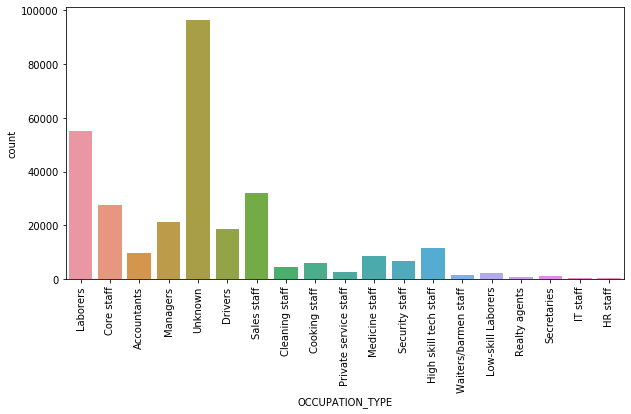

In [75]:
plt.figure(figsize = (10,5))
sns.countplot(data = app_data, x = 'OCCUPATION_TYPE')
plt.xticks(rotation = 90)
plt.show()

In [76]:
#Observation,we can see that most of the occupation types is unknown and,
#The second largest is labourers
#But it will not be the right call to impute 'laborers' into Unknown as it may add bias into the dataset

Analysing the floormax column
count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


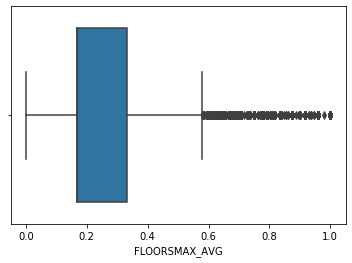

In [77]:
#Now lets look at columns with numerical data
# 1. Analysing FLOORSMAX_AVG column first
print("Analysing the floormax column")
print(app_data.FLOORSMAX_AVG.describe())
print(sns.boxplot(app_data.FLOORSMAX_AVG))

In [78]:
#The column is a numerical column with many outliers
#We can impute the missing values with the median value
print("We can impute the missing value of the column FLOORSMAX_AVG with - {0}".format(app_data.FLOORSMAX_AVG.median()))

We can impute the missing value of the column FLOORSMAX_AVG with - 0.1667


In [79]:
app_data['FLOORSMAX_AVG'].fillna(value = app_data.FLOORSMAX_AVG.median(), inplace = True)

In [ ]:
# Removing some unnecessary columns for application data

app_data = app_data.drop(columns=['NAME_TYPE_SUITE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','REGION_RATING_CLIENT_W_CITY','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE'])

In [82]:
100*(app_data.isnull().sum()/len(app_data))

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.003902
AMT_GOODS_PRICE               0.090403
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
OCCUPATION_TYPE               0.000000
CNT_FAM_MEMBERS               0.000650
REGION_RATING_CLIENT          0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
ORGANIZATION_TYPE        

In [83]:
#Lets look at column OBS_30_CNT_SOCIAL_CIRCLE
app_data.OBS_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

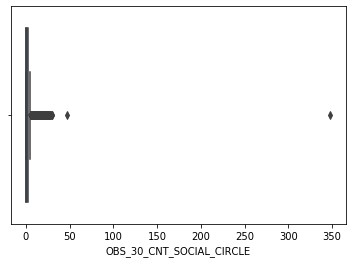

In [84]:
sns.boxplot(app_data.OBS_30_CNT_SOCIAL_CIRCLE)

In [86]:
#Even with crazy high outliers, the  mean and median are pretty close to each other
#So we can replace the na values with the median
app_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app_data.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)

In [87]:
#Lets look at column DEF_30_CNT_SOCIAL_CIRCLE
app_data.DEF_30_CNT_SOCIAL_CIRCLE.describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

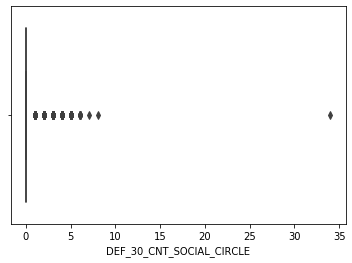

In [90]:
#lets look the distribution for DEF_30_CNT_SOCIAL_CIRCLE column
sns.boxplot(app_data.DEF_30_CNT_SOCIAL_CIRCLE)

In [91]:
#The mean and median are quite close to each other as compared to the outliers,
#we can impute the missing values with median
app_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app_data.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)

In [93]:
#Lets look at the column OBS_60_CNT_SOCIAL_CIRCLE
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

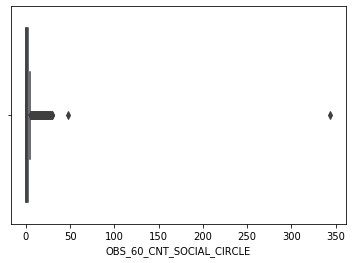

In [94]:
#Lets look at the distribution of the column
sns.boxplot(app_data.OBS_60_CNT_SOCIAL_CIRCLE)

In [95]:
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app_data.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)

In [96]:
#Lets look at column DEF_60_CNT_SOCIAL_CIRCLE
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

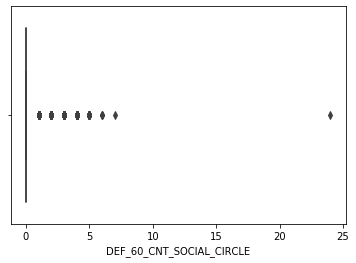

In [99]:
#Lets look at the distribution for the column
sns.boxplot(app_data.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()

In [98]:
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app_data.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)

In [100]:
100*(app_data.isnull().sum()/len(app_data))

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.003902
AMT_GOODS_PRICE               0.090403
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
OCCUPATION_TYPE               0.000000
CNT_FAM_MEMBERS               0.000650
REGION_RATING_CLIENT          0.000000
WEEKDAY_APPR_PROCESS_START    0.000000
HOUR_APPR_PROCESS_START       0.000000
ORGANIZATION_TYPE        

In [102]:
#Lets look at the column AMT_ANNUITY
app_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

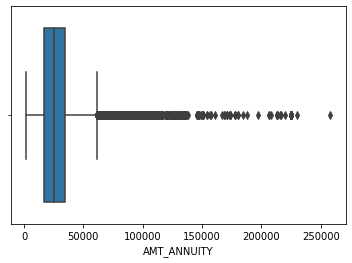

In [103]:
sns.boxplot(app_data.AMT_ANNUITY)

In [105]:
app_data.AMT_ANNUITY.mode()

0    9000.0
dtype: float64

In [106]:
app_data['AMT_ANNUITY'].fillna(app_data.AMT_ANNUITY.median(), inplace = True)

In [107]:
app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

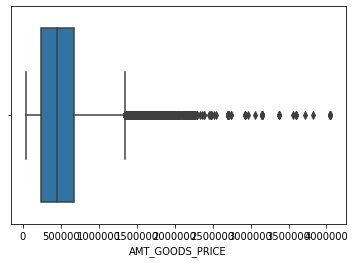

In [108]:
sns.boxplot(app_data['AMT_GOODS_PRICE'])

In [109]:
app_data['AMT_GOODS_PRICE'].fillna(app_data.AMT_GOODS_PRICE.median(), inplace = True)

In [110]:
app_data['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

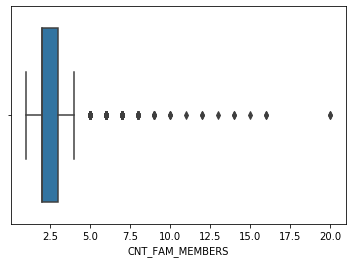

In [112]:
sns.boxplot(app_data['CNT_FAM_MEMBERS'])

In [113]:
app_data['CNT_FAM_MEMBERS'].fillna(app_data.CNT_FAM_MEMBERS.median(), inplace = True)

In [114]:
#Analysing the column DAYS_BIRTH
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [118]:
#converting the negative values to positive for DAYS_BIRTH ,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH columns
app_data.DAYS_BIRTH = app_data.DAYS_BIRTH.abs()

In [116]:
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [119]:
app_data.DAYS_EMPLOYED = app_data.DAYS_EMPLOYED.abs()

In [120]:
app_data.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [121]:
app_data.DAYS_REGISTRATION = app_data.DAYS_REGISTRATION.abs()

In [122]:
app_data.DAYS_REGISTRATION.describe()

count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64

In [123]:
app_data.DAYS_ID_PUBLISH = app_data.DAYS_ID_PUBLISH.abs()

In [125]:
app_data['Age_of_Client'] = (app_data['DAYS_BIRTH']/365).round(2)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_of_Client
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25.92
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.93
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.18
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.07
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.61


<h3> Handling Outliers </h3>

In [126]:
app_data.Age_of_Client.describe()

count    307511.000000
mean         43.936976
std          11.956135
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: Age_of_Client, dtype: float64

In [127]:
app_data.Age_of_Client.nunique()

4805

In [128]:
app_data.Age_of_Client.value_counts(normalize = True)

36.79    0.000419
37.35    0.000406
36.93    0.000406
27.45    0.000406
38.68    0.000406
           ...   
21.03    0.000007
21.02    0.000003
69.12    0.000003
20.52    0.000003
69.01    0.000003
Name: Age_of_Client, Length: 4805, dtype: float64

In [132]:
#Conerting age to a categorical variable
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60','60+']
app_data['Age_Range'] = pd.cut(app_data.Age_of_Client, bins = bins, labels = labels)
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_of_Client,Age_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,25.92,<30
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.93,40-50
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.18,50-60
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.07,50-60
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.61,50-60


In [136]:
#Dropping the 'Age of Clients' column
app_data.drop(columns = 'Age_of_Client', inplace = True)

In [137]:
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [138]:
app_data[app_data['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Range
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50-60
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,30-40
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,<30
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,4.0,10.0,4.0,0.0,0.0,0.0,0.0,1.0,6.0,<30


In [140]:
#Since there are only 4 XNA columns and the female are twice as much as male, we can impute Female where XNA is.
app_data['CODE_GENDER'].replace('XNA', 'F', inplace = True)

In [141]:
#Analysing the AMT_INCOME_TOTAL in the dataframe
app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

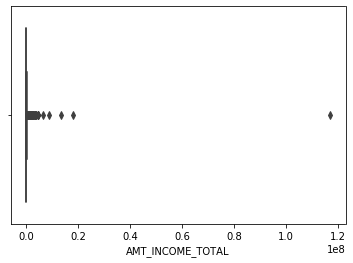

In [142]:
sns.boxplot(app_data.AMT_INCOME_TOTAL)

In [145]:
app_data['AMT_INCOME_TOTAL'].value_counts(normalize = True)

135000.0    0.116256
112500.0    0.100871
157500.0    0.086358
180000.0    0.080384
90000.0     0.073113
              ...   
101119.5    0.000003
79425.0     0.000003
101128.5    0.000003
202275.0    0.000003
262174.5    0.000003
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: float64

In [147]:
print(app_data['AMT_INCOME_TOTAL'].min())
print(app_data['AMT_INCOME_TOTAL'].max())

25650.0
117000000.0


In [148]:
#binning the column app_data['AMT_INCOME_TOTAL']
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
app_data['Income_Range'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins, slot)

In [149]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_Range,Income_Range
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,<30,"(200000, 225000]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,"(250000, 275000]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,"(50000, 75000]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,"(125000, 150000]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,"(100000, 125000]"


In [152]:
app_data.drop('AMT_INCOME_TOTAL',axis = 1, inplace = True)

In [153]:
#Will be easier to detect fraud if we create bins for the Amount columns

In [155]:
## Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

In [156]:
app_data.OCCUPATION_TYPE.value_counts(normalize = True)

Unknown                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

<h3> Imbalance data check </h3>

In [157]:
#checking the Target column for the imbalance
app_data['TARGET'].value_counts(normalize = True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

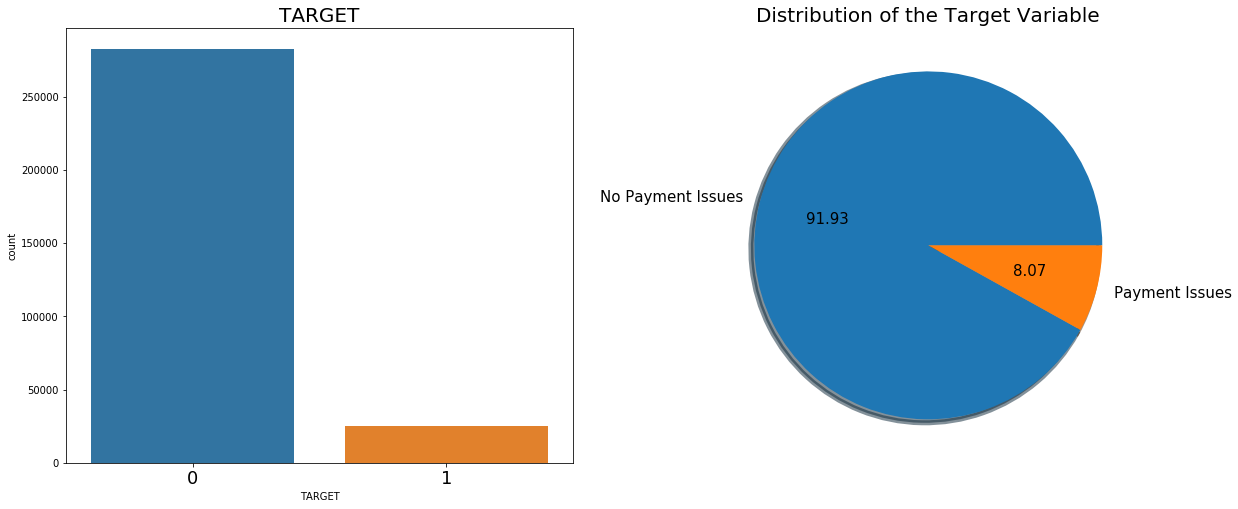

In [163]:
#plotting the graph
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,8))
ax = sns.countplot(app_data.TARGET, ax = ax1)
ax1.set_title('TARGET', Fontsize = 20)
plt.setp(ax1.xaxis.get_majorticklabels(), fontsize = 18)

ax2 = plt.pie(x= app_data.TARGET.value_counts(normalize = True),autopct='%.2f',textprops={'fontsize':15},shadow=True,labels=['No Payment Issues','Payment Issues'],wedgeprops = {'linewidth': 5})
plt.title('Distribution of the Target Variable',fontsize=20)

plt.show()

In [164]:
#Checking the imbalance percentage
print('The imbalance percentage is %.2f'%(app_data.TARGET.value_counts()[0]/app_data.TARGET.value_counts()[1]))

The imbalance percentage is 11.39


In [165]:
#We can divide the dataframe into two dataframes for people with no difficulty for payments and people with payment difficulties
target0 = app_data.loc[app_data['TARGET'] == 0]
target1 = app_data.loc[app_data['TARGET'] == 1]

<h3> Univariate Analysis </h3>

In [167]:
#Function for a countplot with distribution of number of cases for defaulters and non-defaulters
# function for countplot

def graph_uni(col):
    plt.figure(figsize=(17,6))
    plt.style.use('bmh')
    plt.subplot(1, 2, 1)
    sns.countplot(col, data=target0)
    plt.title('Distribution of '+ '%s' %col +' for target=0', fontsize=15)
    plt.xlabel(col , fontsize=15)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    
    plt.subplot(1, 2, 2)
    sns.countplot(col, data=target1)
    plt.title('Distribution of '+ '%s' %col +' for target=1', fontsize=14)
    plt.xlabel(col , fontsize=15)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

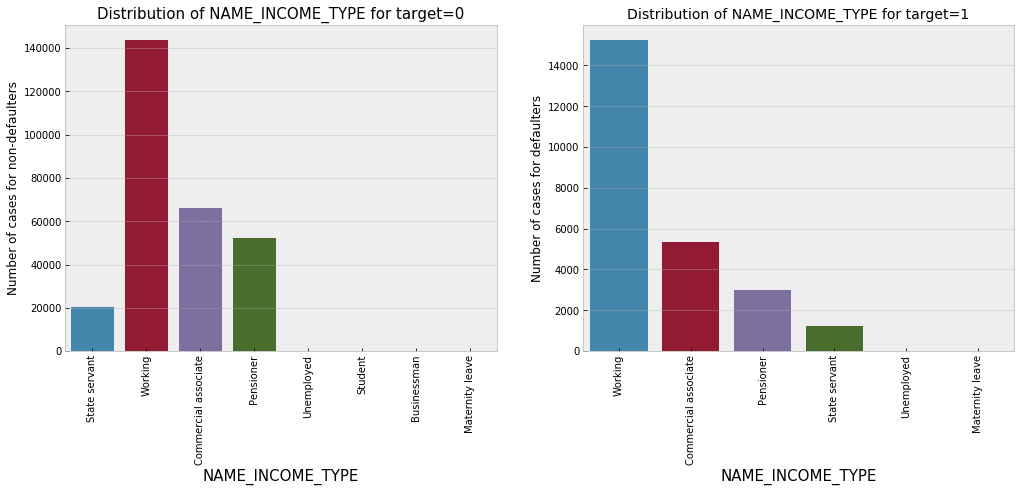

In [168]:
#graph for NAME_INCOME_TYPE
graph_uni('NAME_INCOME_TYPE')
plt.show()

The working class has a high number of defaulters

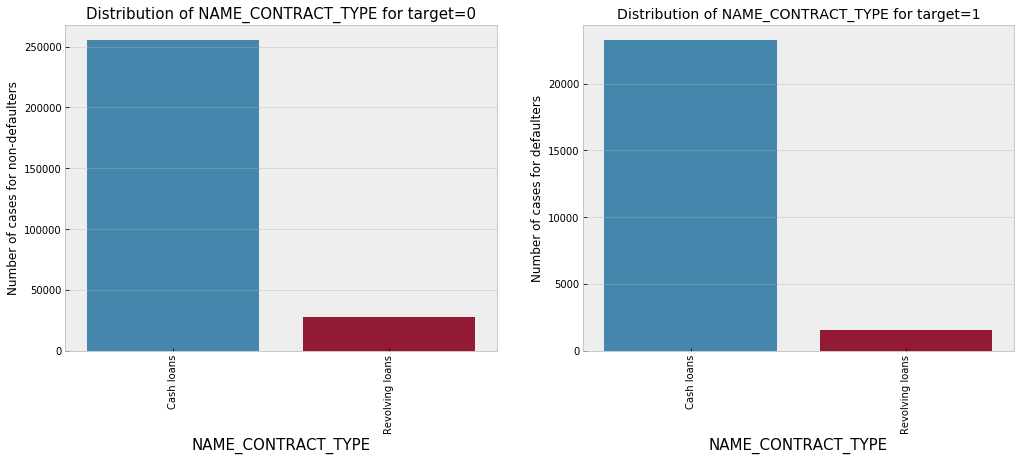

In [169]:
# graph for NAME_CONTRACT_TYPE column

graph_uni('NAME_CONTRACT_TYPE')

We can see the revolving loans has less distribution in number of cases for defaulters compared to non-defaulters.

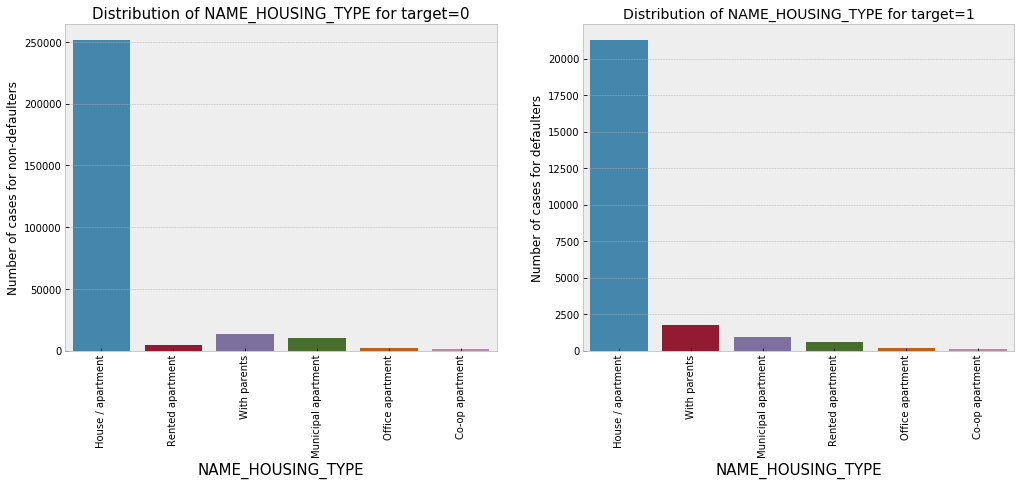

In [170]:
# graph for NAME_HOUSING_TYPE column

graph_uni('NAME_HOUSING_TYPE')

Inference : People living with parents and in apartments show high number of default as compared to non defaulters. The reason is that living with parents so less income and living in municipal apartments so more cash flow in apartment rent.

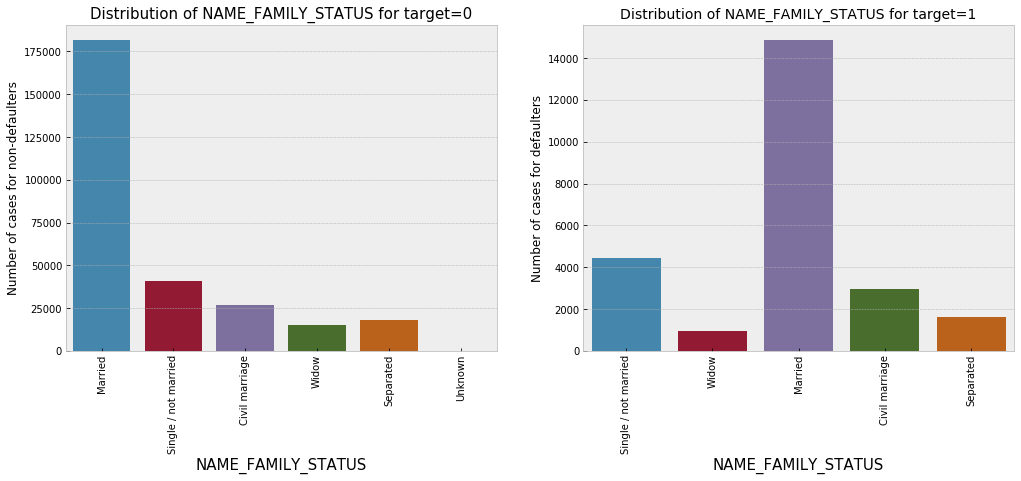

In [171]:
# graph for CODE_GENDER column

graph_uni('NAME_FAMILY_STATUS')

Inference : Single/not married category are showing high number of defaulters.

In [172]:
#Ordered Categorical Data

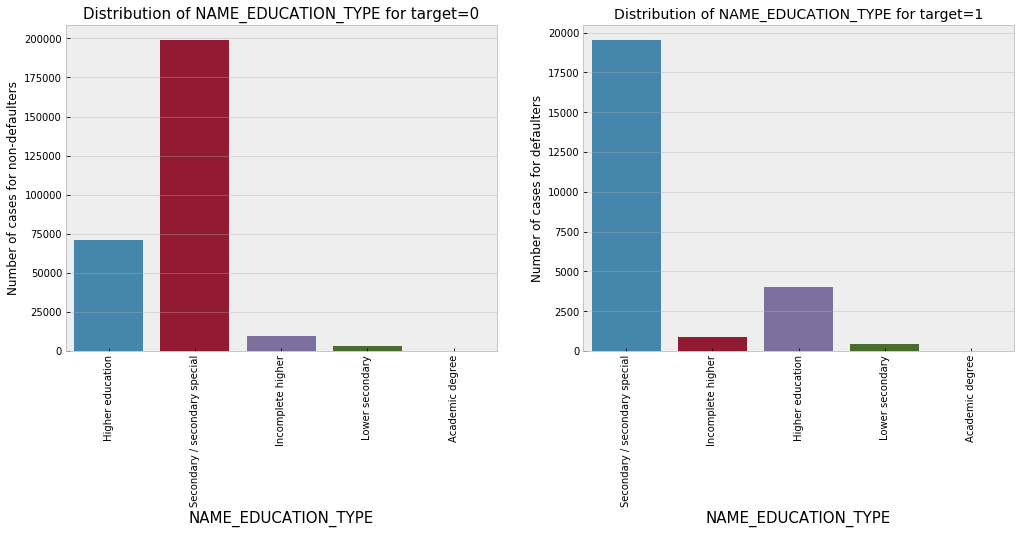

In [173]:
# graph for NAME_EDUCATION_TYPE column

graph_uni('NAME_EDUCATION_TYPE')

Inference : Higher education is more in non defaulters as compared to in defaulters category. This comes to a conclusion that higher the

education, more the individual is capable of paying the loan because of good salary package

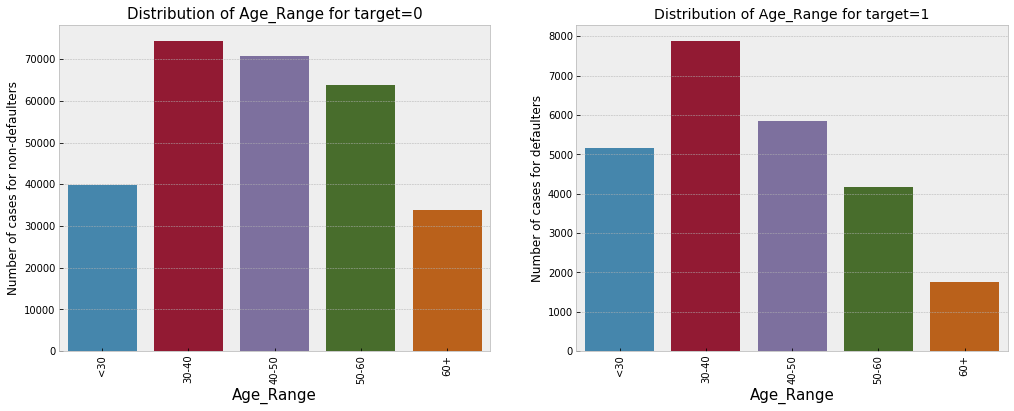

In [175]:
# graph for AGE_RANGE column

graph_uni('Age_Range')

Inference : For age group '40-50' number of loan repayers decreased for target = 1

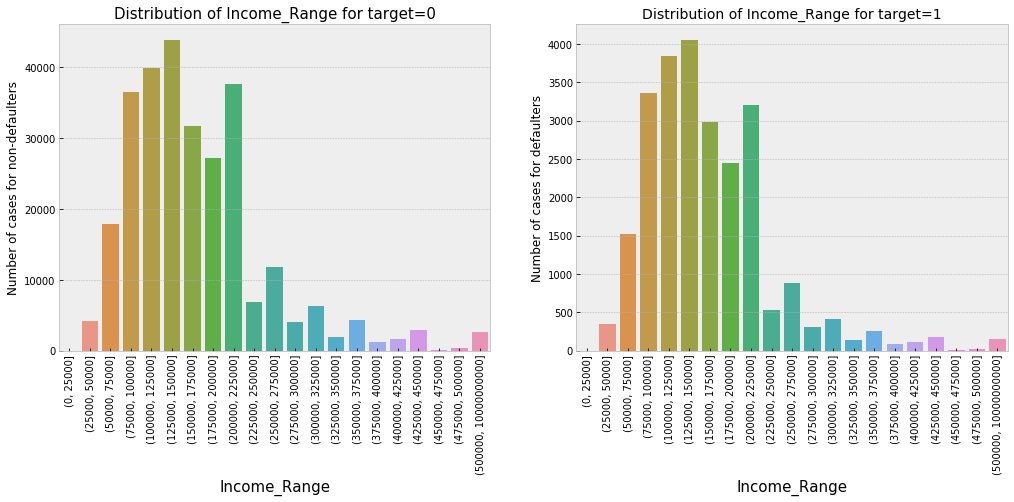

In [177]:
# graph for Income_Range column

graph_uni('Income_Range')

Inference : Income Range of 125000-150000 is maximum for both Loan Repayers & Loan Defaulters

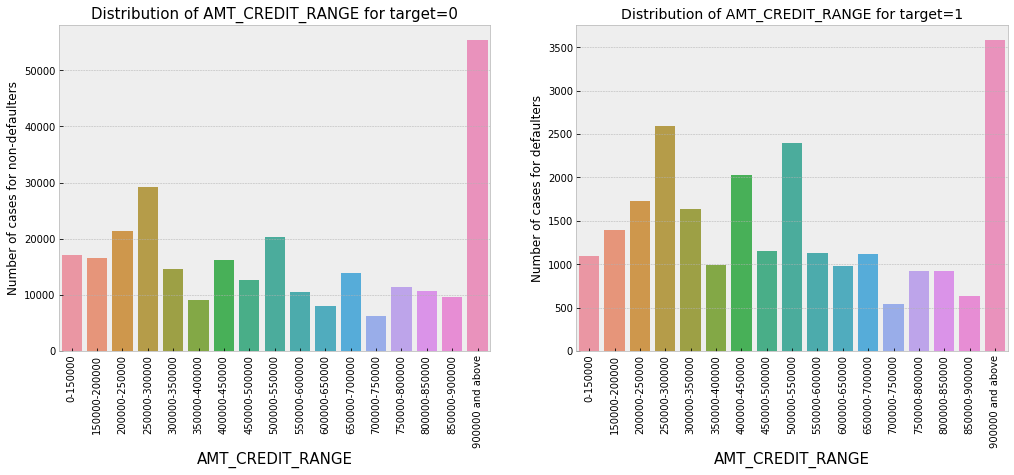

In [178]:
# graph for AMT_CREDIT_RANGE column

graph_uni('AMT_CREDIT_RANGE')

Inference : Amount Credit Range value of 900000 and above is the highest ranked in both scenarios

In [180]:
#Numerical - Categorical

In [181]:
def graph(customer_data, col, title, hue =None):
    
    sns.set_style("darkgrid")
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30


    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(customer_data[col].unique()) + 6.5 + 5*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax = sns.countplot(data = customer_data, x= col, order=customer_data[col].value_counts().index, hue = hue, palette='pastel') 
    plt.show()

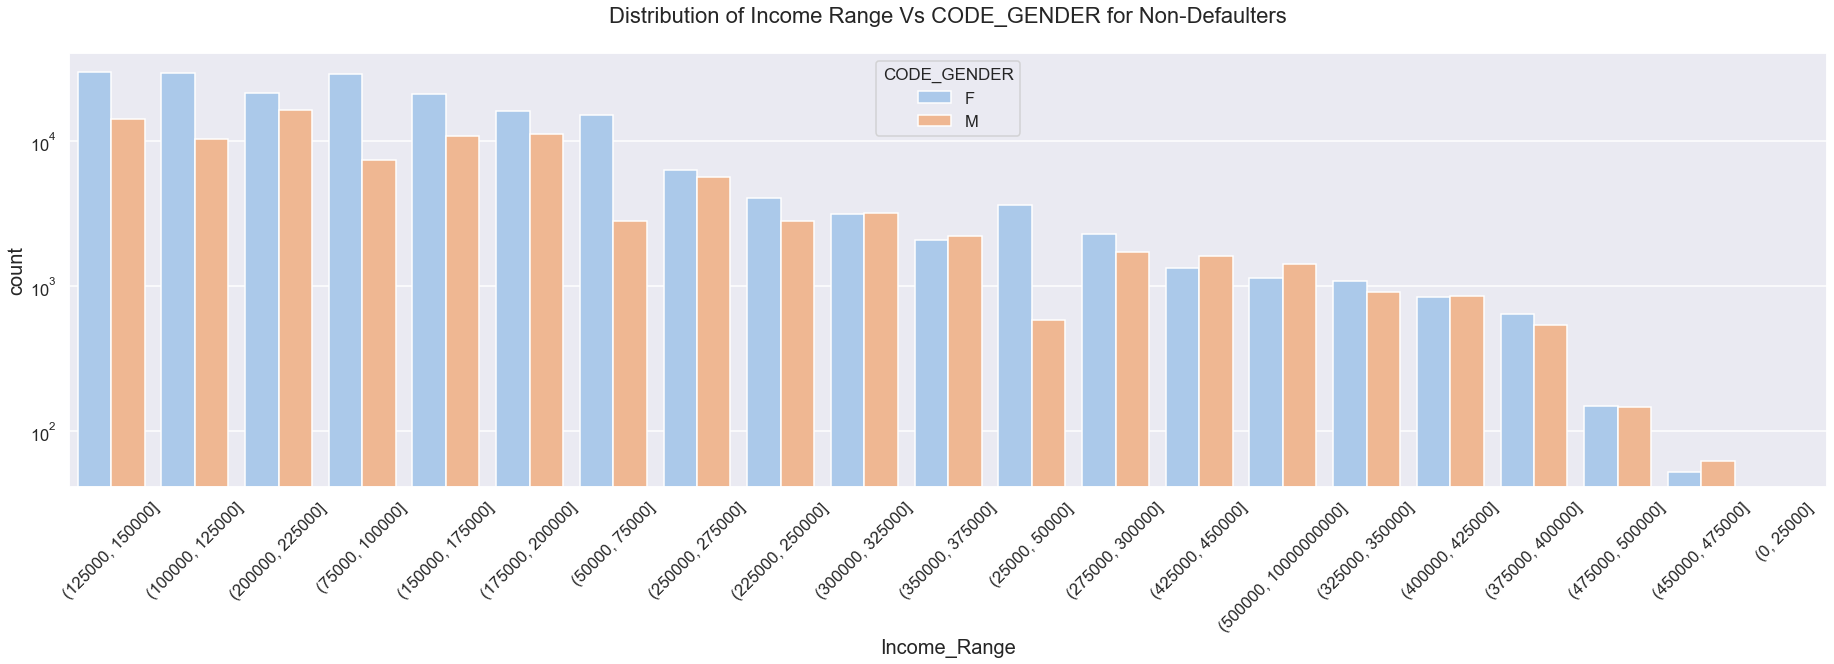

In [183]:
# Countplot for Income Range Type Vs Gender for target = 0

graph(target0 ,col='Income_Range',title='Distribution of Income Range Vs CODE_GENDER for Non-Defaulters', hue='CODE_GENDER')

Inference : Female numbers are mostly high in every proportion and also female credit are mostly higher than males(Loan Repayers)

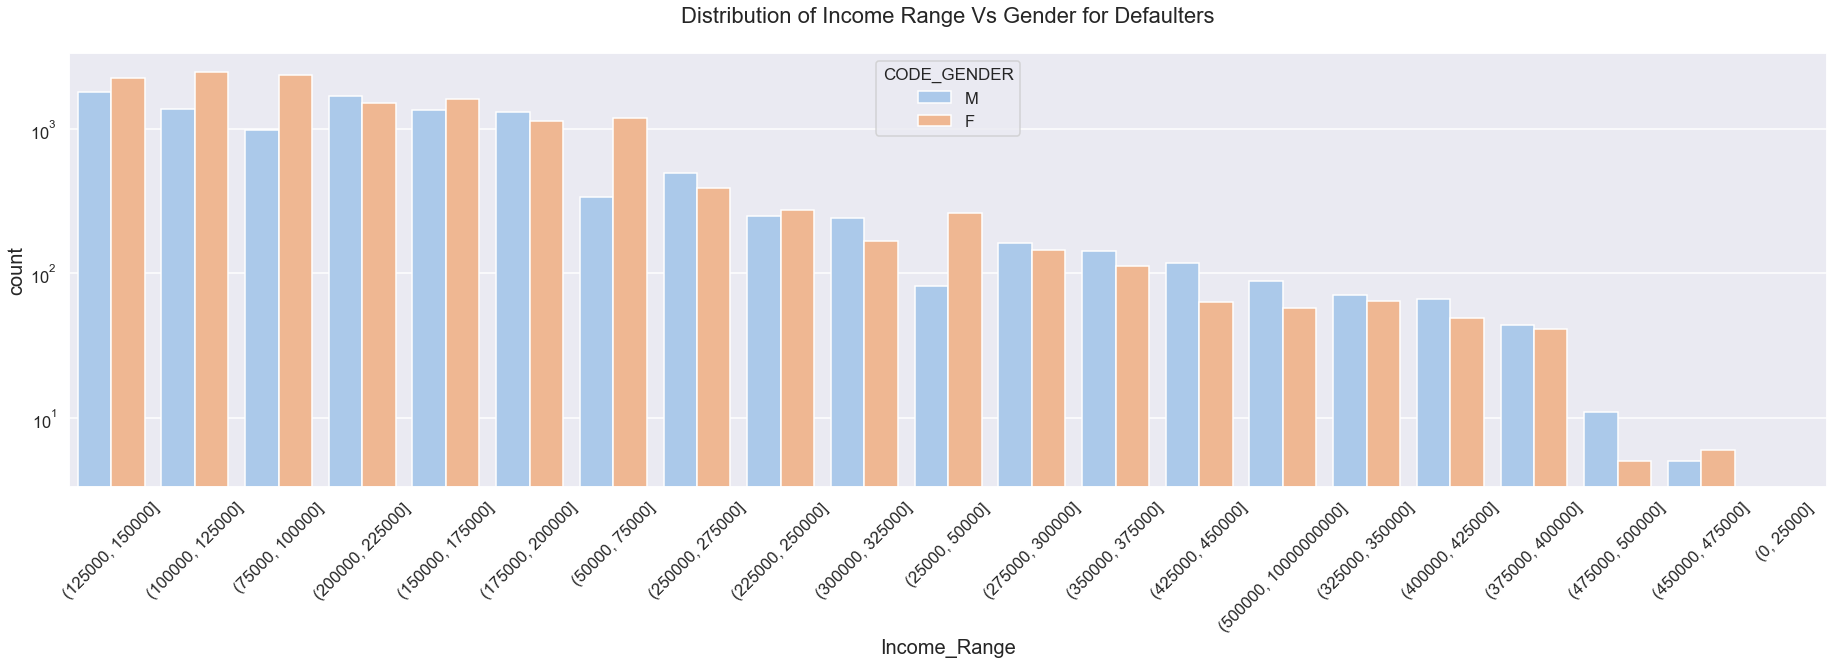

In [184]:
# Countplot for Income Range Type Vs Gender for target = 1

graph(target1 ,col='Income_Range',title='Distribution of Income Range Vs Gender for Defaulters', hue='CODE_GENDER')

Inference : Male numbers are mostly high in every proportion and also Male credit are mostly higher than Females(Loan Defaults)

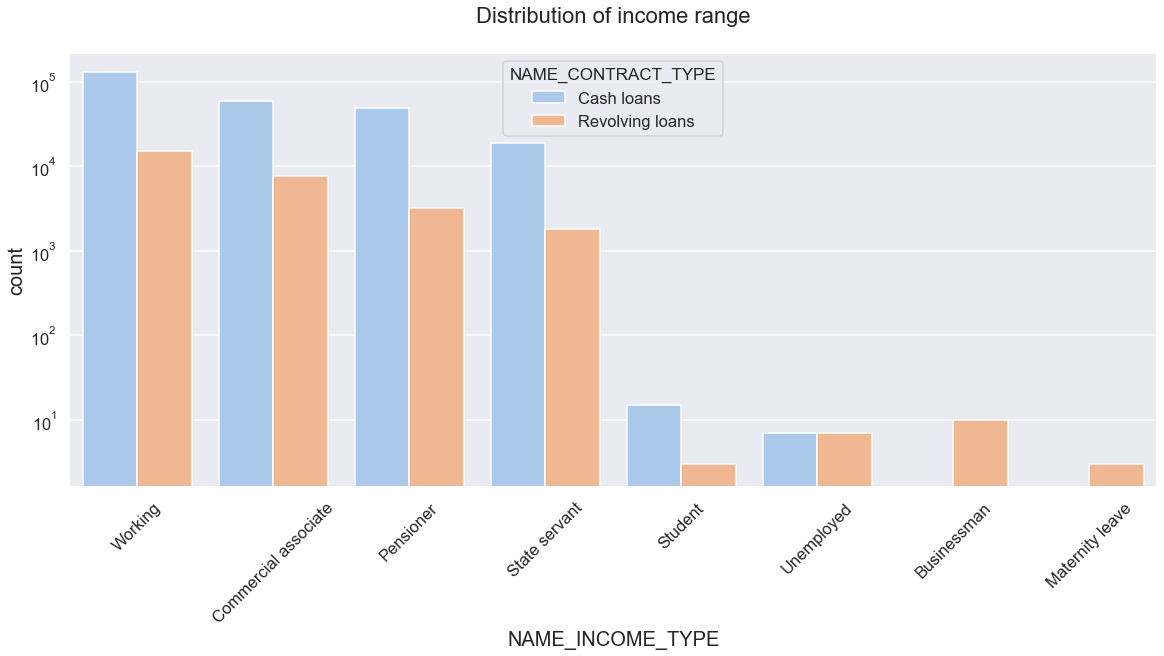

In [185]:
# Countplot for Income Type Vs Contract type for target = 0

graph(target0 ,col='NAME_INCOME_TYPE',title='Distribution of income range', hue='NAME_CONTRACT_TYPE')

Inference : Working class has more number of Cash Loans

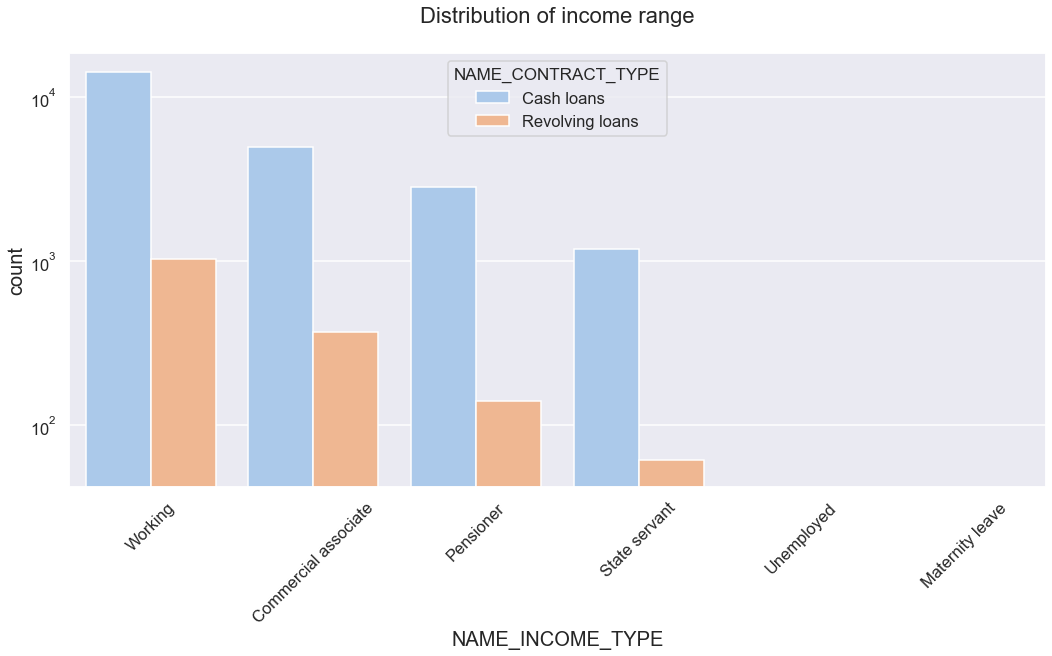

In [186]:
# Countplot for Income Type Type Vs Contract type for target = 1

graph(target1 ,col='NAME_INCOME_TYPE',title='Distribution of income range', hue='NAME_CONTRACT_TYPE')

Inference : Working class has more number of Cash Loans

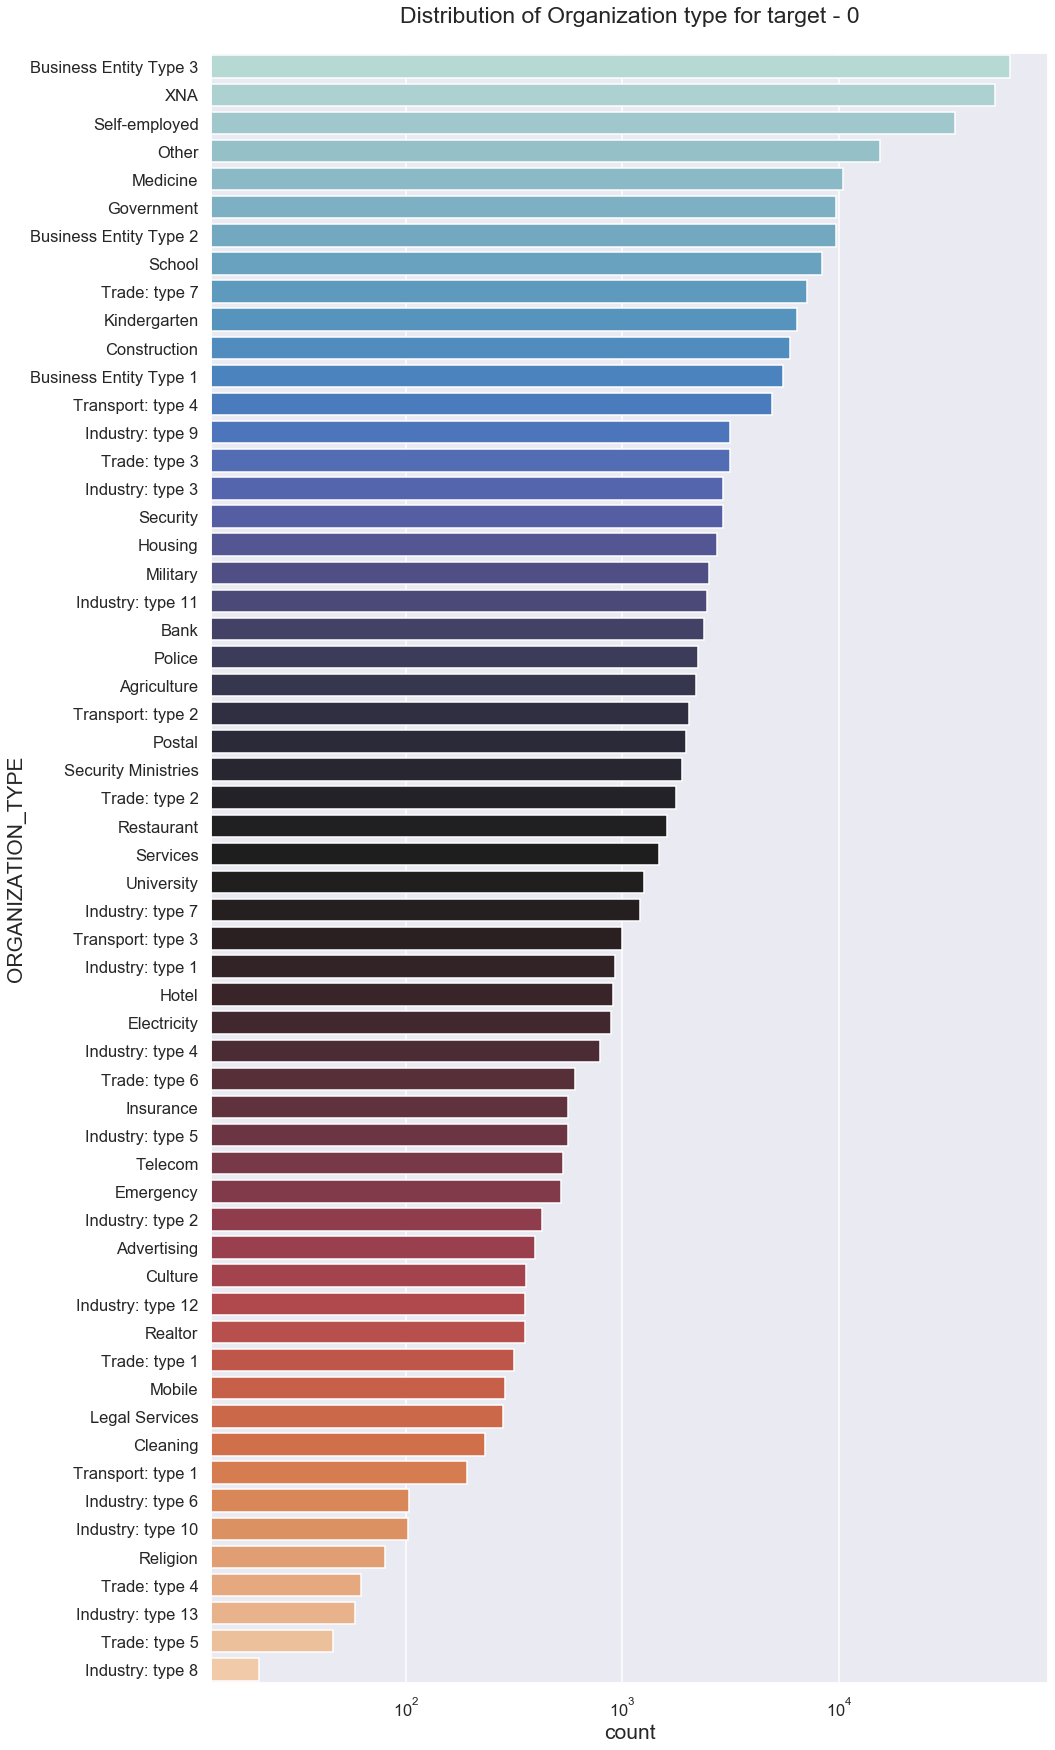

In [187]:
# function for countplot

plt.figure(figsize=(15,30))
sns.set_style('darkgrid')
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')

plt.title("Distribution of Organization type for target - 0")

sns.countplot(data=target0 ,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index, palette="icefire")
plt.show()

Inference : ‘Business entity Type 3’ and ‘Self employed’ hold the most credits and less credit to industry trade: type5 and Industry: type 8(target = 0)

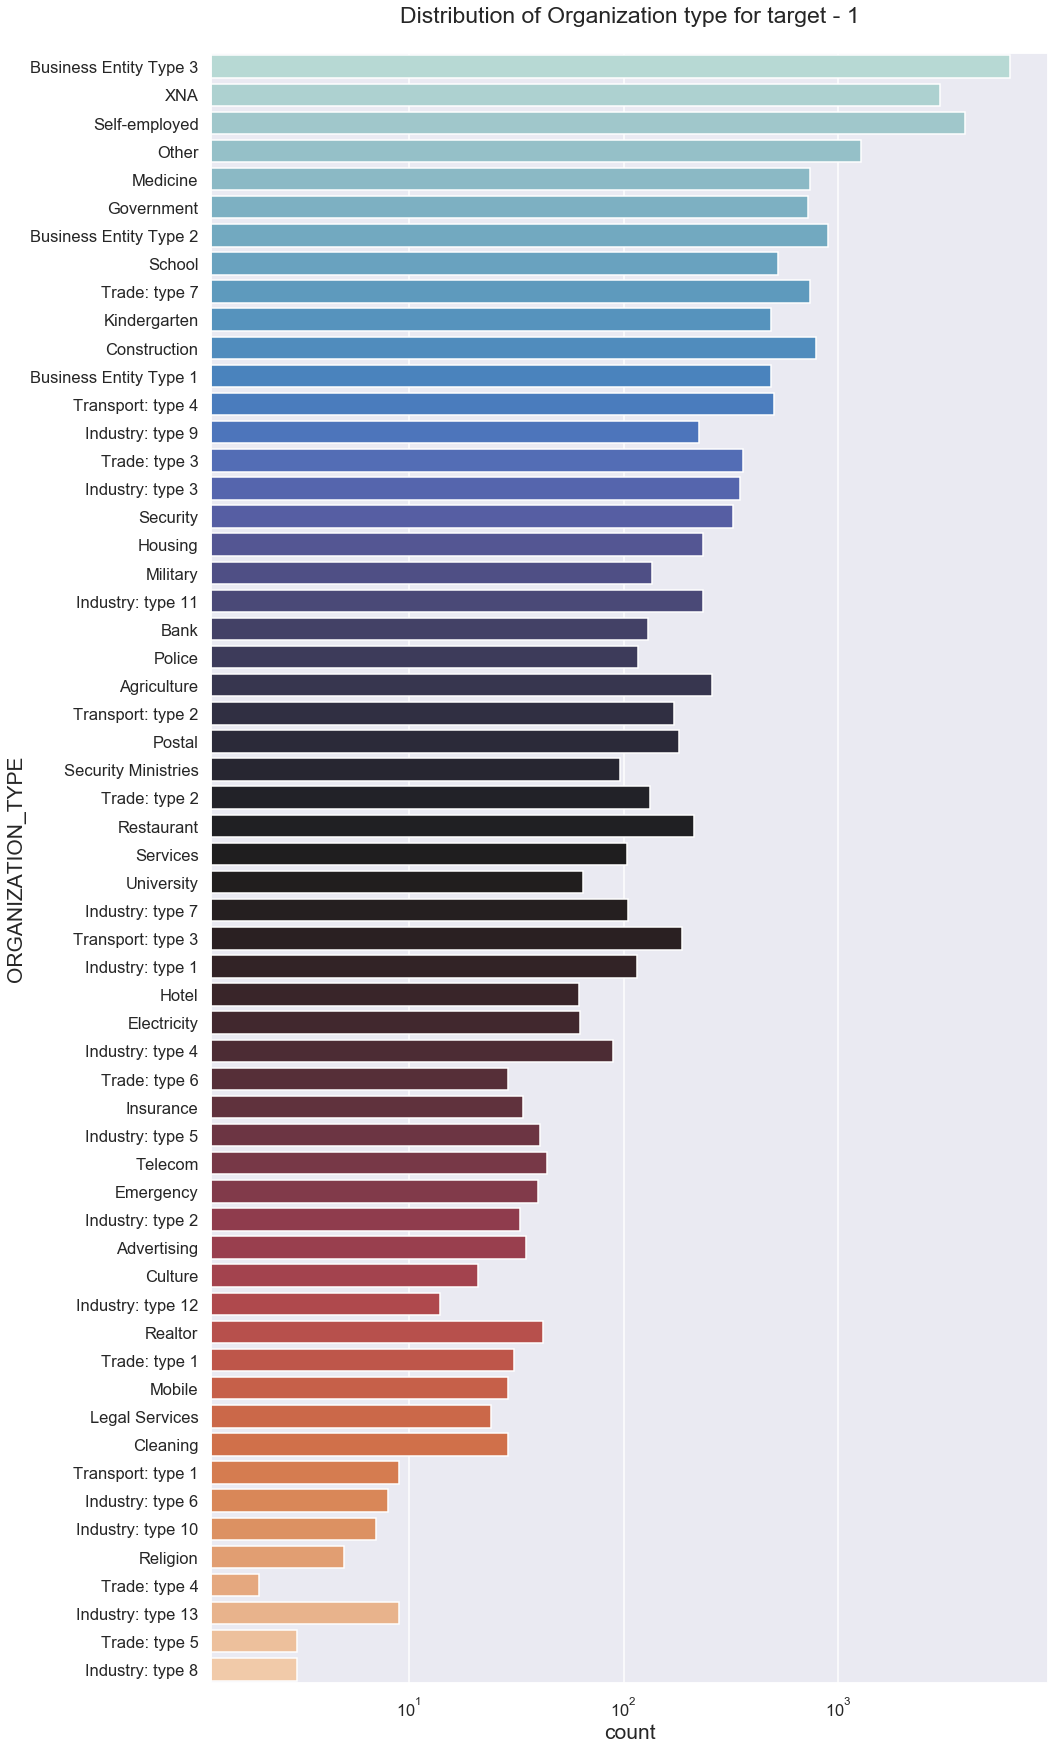

In [188]:
# Graph for ORGANIZATION TYPE

plt.figure(figsize=(15,30))
sns.set_style('darkgrid')
plt.rcParams["axes.labelsize"] = 21
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')

plt.title("Distribution of Organization type for target - 1")

sns.countplot(data=target1 ,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index, palette="icefire")

plt.show()

Inference : ‘Business entity Type 3’ and ‘Self employed’ hold the most credits and less credit to industry trade: type5 and Industry: type 8 (target = 1)

<h3>Bivariate Analysis</h3>

In [190]:
#Numerical - Numerical Analysis

In [191]:
# Creating the function for the numeric bivariate analysis

def graph_numeric (a,b):
    sns.set_style(style='ticks')
    fig=plt.figure(figsize=(16,7))
    
    sns.scatterplot(data = target0, y = b, x = a,  label='Loan Repayers',    color='steelblue')
    sns.scatterplot(data = target1, y = b, x = a,  label='Loan Defaulters',  color='hotpink')
    
    plt.title(f'{a} vs {b}',fontsize=21)
    plt.show()

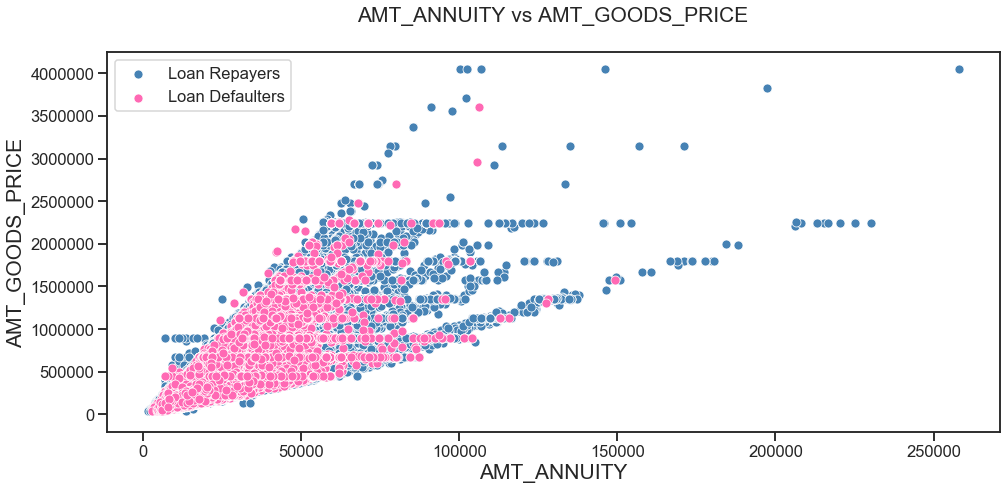

In [192]:
# graph for AMT_ANNUITY vs AMT_GOODS_PRICE

graph_numeric ('AMT_ANNUITY','AMT_GOODS_PRICE')

Inference : Correlation between Amount Annuity & Amount Goods Price is pretty moderates but they are not thoroughly correlated because there are above par values for both the columns. . Amount Annuity having values less than 70000 are prone to be in default while values above 70000 are tend to decrease in defaulters.

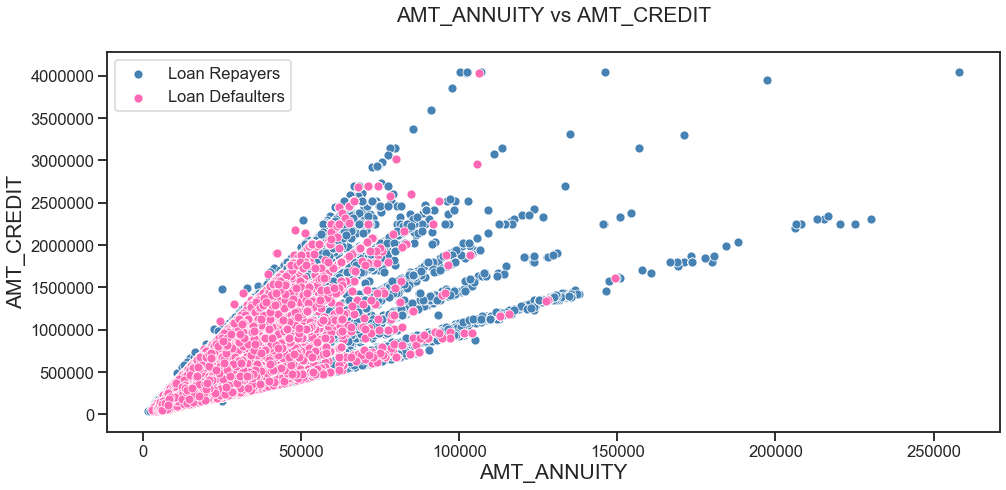

In [193]:
# graph for AMT_ANNUITY vs AMT_CREDIT

graph_numeric('AMT_ANNUITY','AMT_CREDIT')

Inference :

There is fair correlation between the two columns Amount Annuity & Amount Credit. There's a decrease in defaulters when Amount Annuity increases. Most of the defaulters are having AMT_ANNUITY values less than 60000.

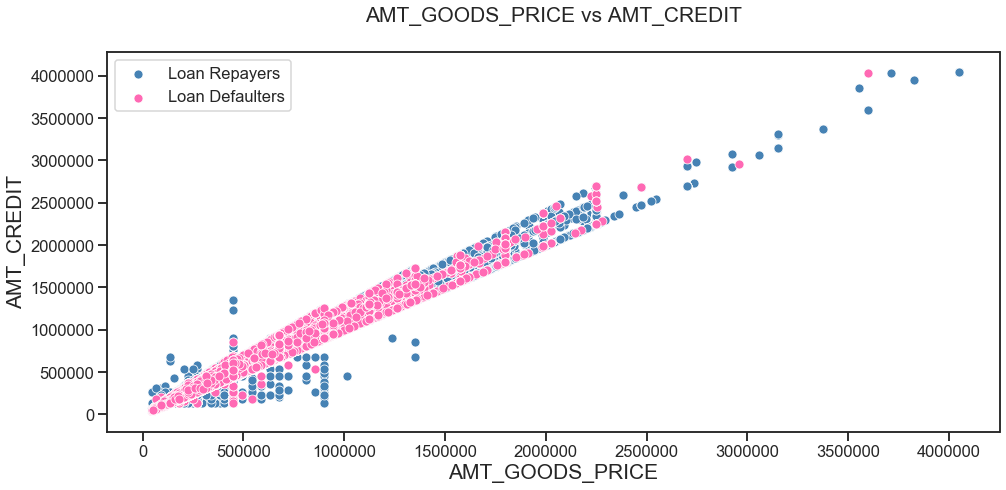

In [194]:
# graph for AMT_GOODS_PRICE vs AMT_CREDIT

graph_numeric('AMT_GOODS_PRICE','AMT_CREDIT')

Inference : Amount Good Price & Amount Credit have a strong correlation as clients having goods price and will repay their loans.

<h3>Correlation or Multivariate analysis</h3>

<h4>TARGET 0 : Loan Repayer</h4>

In [195]:
# Dropping the columns which are not required for target 0

cols_drop = ['SK_ID_CURR','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
target0 = target0.drop(columns=cols_drop)
# Creating the correlation matrix for the Loan defaulter data frame

corr_t0 = target0.corr().abs().round(3)
corr_t0

,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000,0.003,0.021,0.001,0.024,0.337,0.245,0.186,0.029,0.879,0.023,0.005
AMT_CREDIT,NaN,0.003,1.000,0.771,0.987,0.101,0.047,0.070,0.013,0.001,0.065,0.103,0.054
AMT_ANNUITY,NaN,0.021,0.771,1.000,0.776,0.121,0.012,0.105,0.039,0.014,0.076,0.132,0.054
AMT_GOODS_PRICE,NaN,0.001,0.987,0.776,1.000,0.104,0.045,0.069,0.016,0.004,0.063,0.104,0.063
REGION_POPULATION_RELATIVE,NaN,0.024,0.101,0.121,0.104,1.000,0.025,0.007,0.052,0.001,0.023,0.539,0.173
DAYS_BIRTH,NaN,0.337,0.047,0.012,0.045,0.025,1.000,0.626,0.333,0.271,0.286,0.002,0.096
DAYS_EMPLOYED,NaN,0.245,0.070,0.105,0.069,0.007,0.626,1.000,0.215,0.277,0.238,0.038,0.095
DAYS_REGISTRATION,NaN,0.186,0.013,0.039,0.016,0.052,0.333,0.215,1.000,0.100,0.176,0.076,0.008
DAYS_ID_PUBLISH,NaN,0.029,0.001,0.014,0.004,0.001,0.271,0.277,0.100,1.000,0.020,0.009,0.034


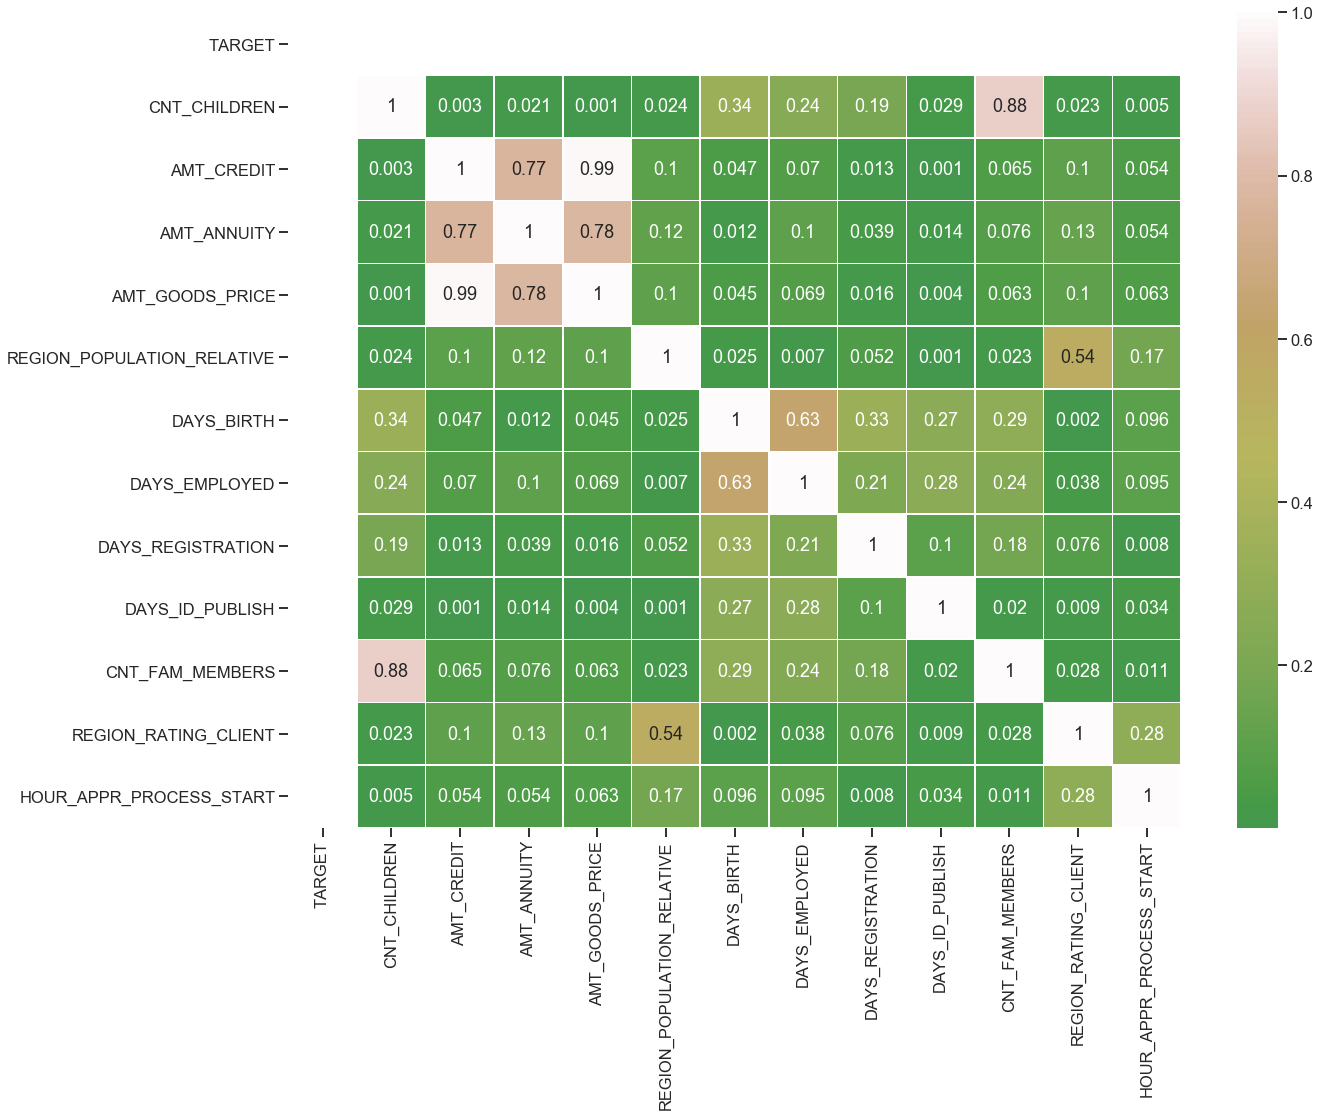

In [196]:
# Visualising the correlation data of target 0 using heatmaps

fig = plt.figure(figsize=(20,15))

sns.heatmap(data=corr_t0 ,linewidths=.5,center=0.1,cmap='gist_earth',annot= True)

plt.show()

In [198]:
# Unstacking the TARGET_0 variable

c = corr_t0.abs()
s = c.unstack()

In [199]:
# Finding top 10 correlation among the people with no payment issues and displaying it.

target_0_corr = s[s.index.get_level_values(0)!= s.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

top_10_target0 = pd.DataFrame(target_0_corr)

top_10_target0 = top_10_target0.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

top_10_target0.head(10)

,Var1,Var2,Correlation
0,AMT_GOODS_PRICE,AMT_CREDIT,0.987
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879
2,AMT_ANNUITY,AMT_GOODS_PRICE,0.776
3,AMT_ANNUITY,AMT_CREDIT,0.771
4,DAYS_BIRTH,DAYS_EMPLOYED,0.626
5,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.539
6,DAYS_BIRTH,CNT_CHILDREN,0.337
7,DAYS_BIRTH,DAYS_REGISTRATION,0.333
8,CNT_FAM_MEMBERS,DAYS_BIRTH,0.286
9,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START,0.284


<h4>TARGET 1 : Loan Defaulter</h4>

In [200]:
# Dropping the columns which are not required for target1

target1 = target1.drop(columns=cols_drop)
# Creating the correlation matrix for the Loan defaulter dataframe

corr_t1 = target1.corr().abs().round(3)
corr_t1

,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,HOUR_APPR_PROCESS_START
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000,0.002,0.031,0.008,0.032,0.259,0.193,0.149,0.032,0.885,0.041,0.024
AMT_CREDIT,NaN,0.002,1.000,0.752,0.983,0.069,0.135,0.002,0.026,0.052,0.051,0.059,0.032
AMT_ANNUITY,NaN,0.031,0.752,1.000,0.752,0.072,0.014,0.081,0.034,0.017,0.076,0.074,0.031
AMT_GOODS_PRICE,NaN,0.008,0.983,0.752,1.000,0.076,0.136,0.007,0.026,0.056,0.047,0.066,0.044
REGION_POPULATION_RELATIVE,NaN,0.032,0.069,0.072,0.076,1.000,0.048,0.016,0.056,0.016,0.030,0.443,0.143
DAYS_BIRTH,NaN,0.259,0.135,0.014,0.136,0.048,1.000,0.582,0.289,0.253,0.203,0.034,0.062
DAYS_EMPLOYED,NaN,0.193,0.002,0.081,0.007,0.016,0.582,1.000,0.192,0.229,0.187,0.003,0.060
DAYS_REGISTRATION,NaN,0.149,0.026,0.034,0.026,0.056,0.289,0.192,1.000,0.097,0.146,0.104,0.033
DAYS_ID_PUBLISH,NaN,0.032,0.052,0.017,0.056,0.016,0.253,0.229,0.097,1.000,0.032,0.001,0.022


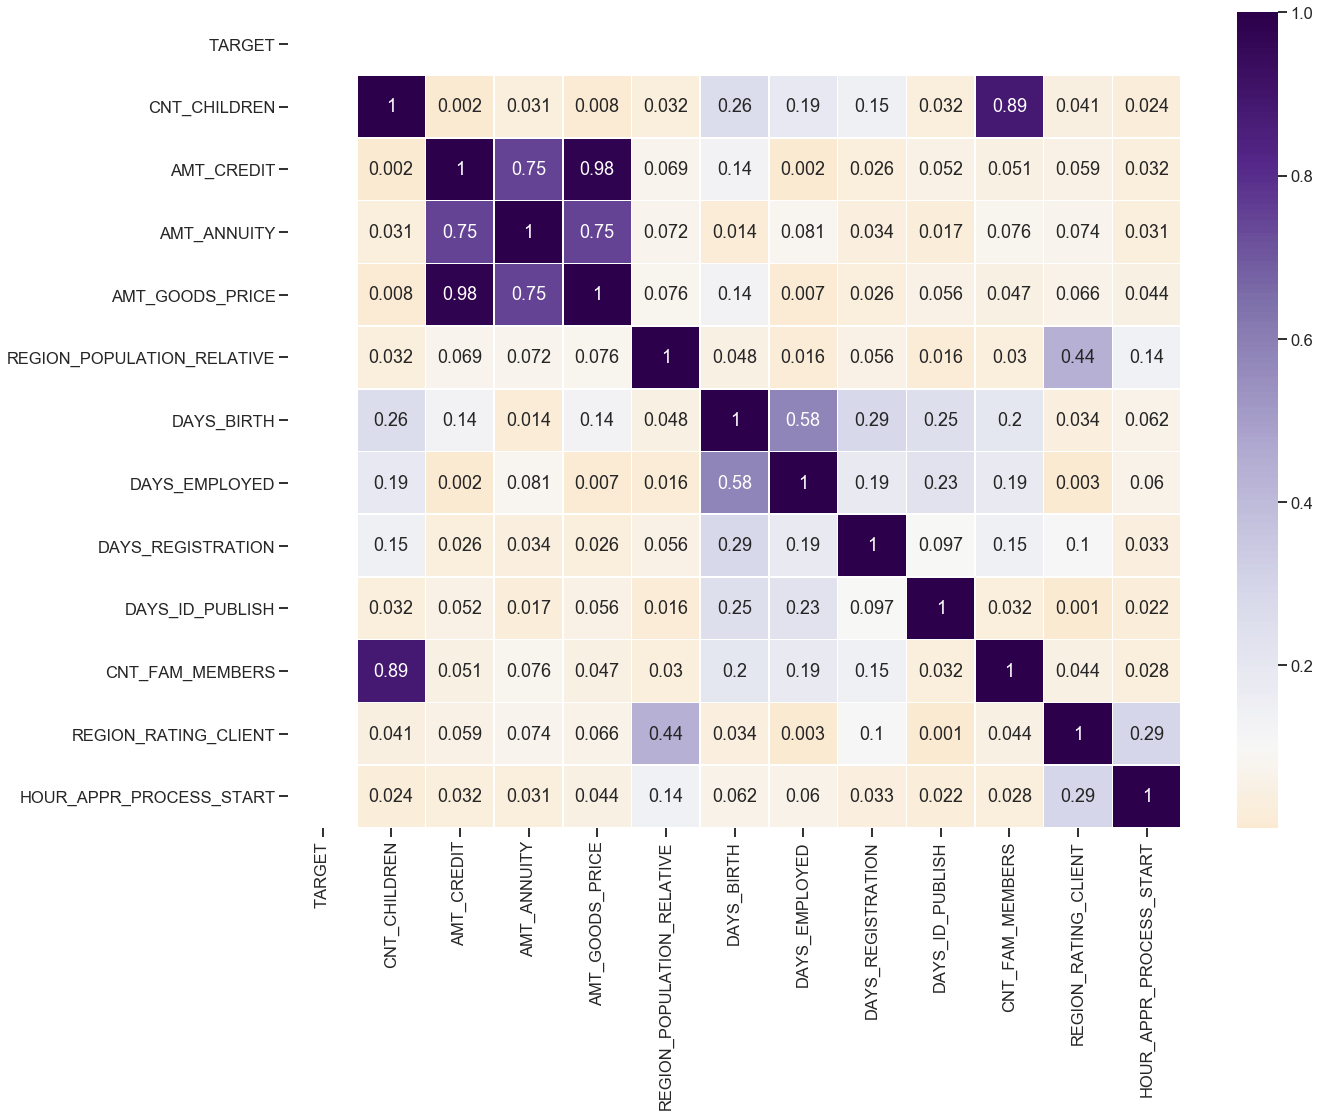

In [201]:
# PLotting the heatmap for displaying the correlation for target 1

fig = plt.figure(figsize=(20,15))

sns.heatmap(data=corr_t1,annot=True,cmap='PuOr',linewidths=0.5,center=0.1)

plt.show()

In [202]:
#unstacking the correlation of target1 variable
c1 = corr_t1

s1 = c1.unstack()
# Displaying Top 10 Correlations from target_1 : Loan Defaulter data frame

target_1_corr = s1[s1.index.get_level_values(0)!= s1.index.get_level_values(1)].sort_values(ascending=False,kind='quicksort').drop_duplicates()

top_10_target1  = pd.DataFrame(target_1_corr)

top_10_target1 = top_10_target1.reset_index().rename(columns={'level_0':'Var1','level_1':'Var2',0:'Correlation'}).dropna()

top_10_target1.head(10)

,Var1,Var2,Correlation
0,AMT_CREDIT,AMT_GOODS_PRICE,0.983
1,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885
2,AMT_GOODS_PRICE,AMT_ANNUITY,0.752
3,DAYS_EMPLOYED,DAYS_BIRTH,0.582
4,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.443
5,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT,0.294
6,DAYS_REGISTRATION,DAYS_BIRTH,0.289
7,DAYS_BIRTH,CNT_CHILDREN,0.259
8,DAYS_ID_PUBLISH,DAYS_BIRTH,0.253
9,DAYS_EMPLOYED,DAYS_ID_PUBLISH,0.229


Insights from Correlation
For target variable there is no correlation as there are empty space in the graph and NAN in the tables while comparing with other variables.

Credit amount is highly correlated with amount of goods price which is slightly different from target 0 i.e Loan Repayers.

The correlation is strong between family member and children counts, although the correlation increases for the defaulters.

The loan annuity correlation with credit amount and also with goods price has slightly reduced in defaulters(0.748) when compared to repayers(0.777)

We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).

Days_birth and number of children correlation has reduced to 0.256 in defaulters when compared to 0.336 in repayers.


<h4>Merging the Dataset</h4>

In [206]:
# Merging the Application Dataset with Previous Appliaction Dataset

merge_df = pd.merge(left=app_data,right=app_data_prev,how='inner',on='SK_ID_CURR',suffixes='_x')
# Renaming the column names after merging the data

rename_merge_df = merge_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [205]:
app_data_prev = pd.read_csv("riskassessment/previous_application.csv") #reading the dataset

In [207]:
# Removing unwanted columns for analysis of merged data

rename_merge_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'], axis=1, inplace=True)

Univariate analysis on Merged Dataset

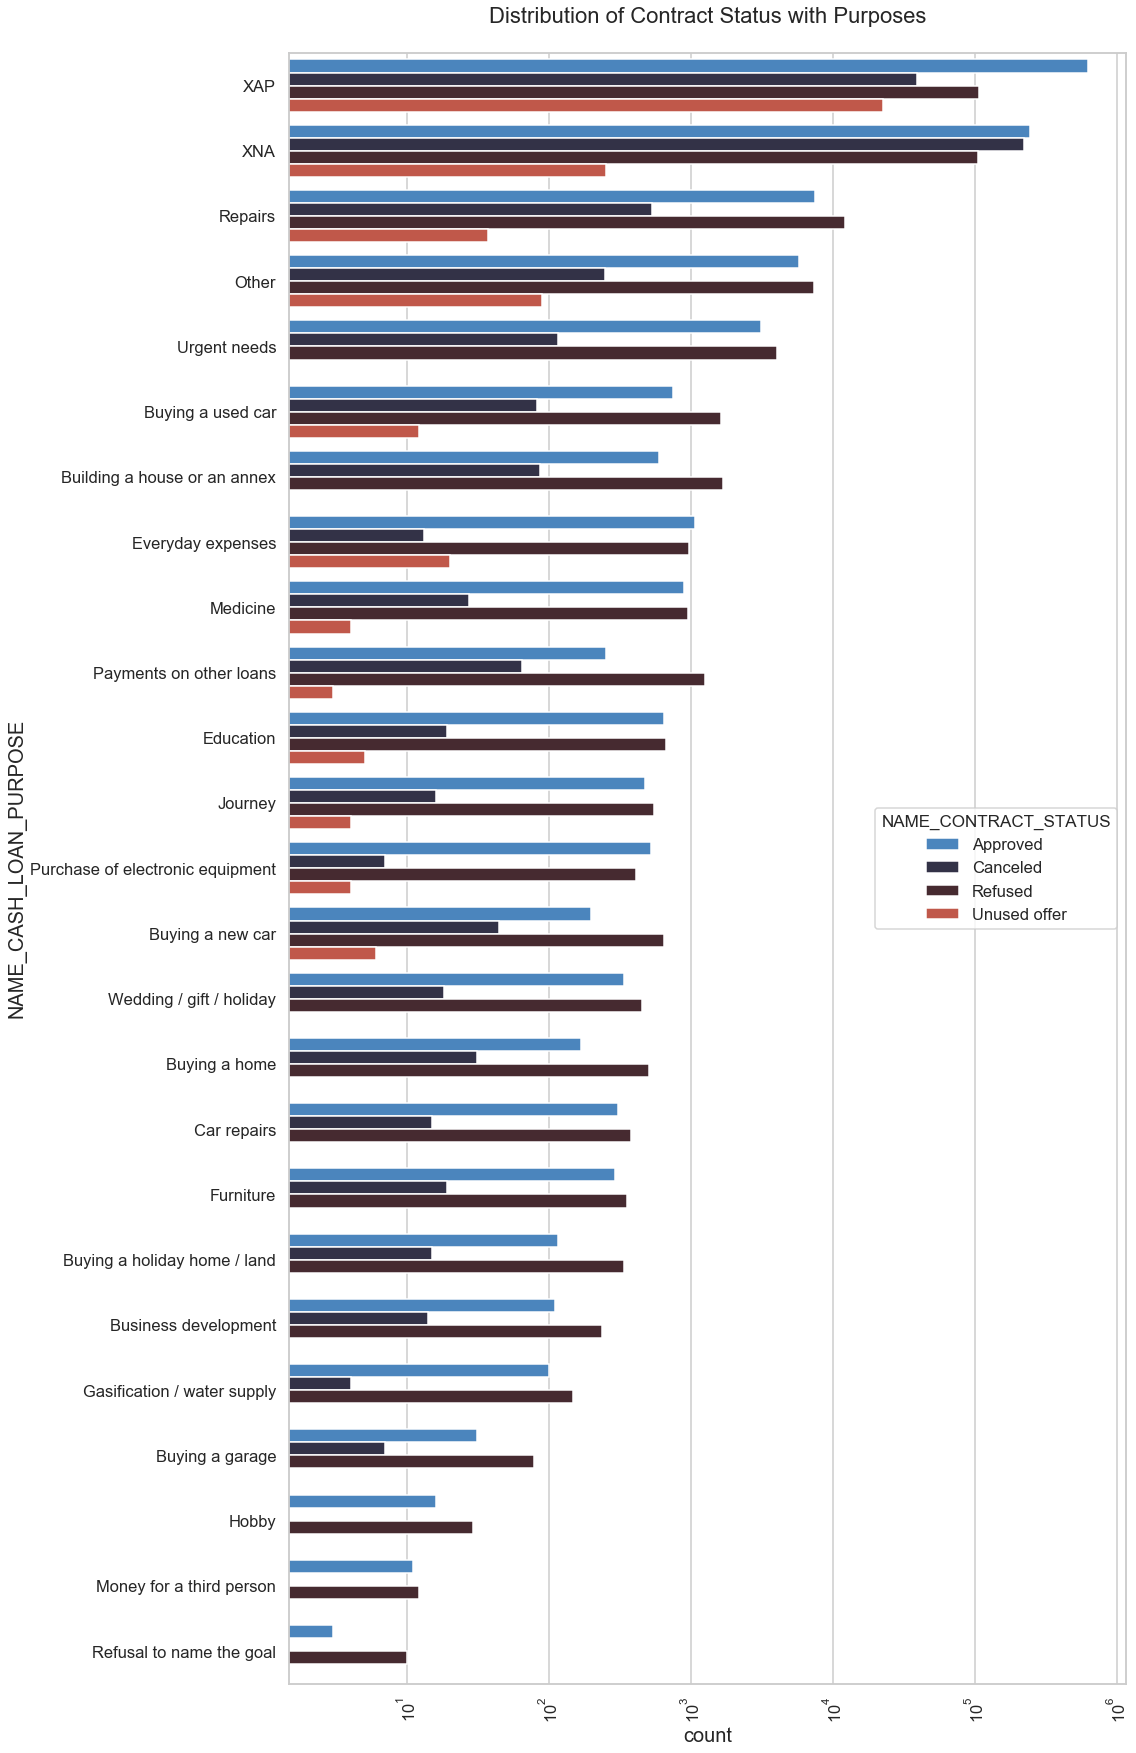

In [208]:
# Distribution of Cash Loans Vs Contract Purpose

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Contract Status with Purposes')

ax = sns.countplot(data = rename_merge_df, y= 'NAME_CASH_LOAN_PURPOSE', order=rename_merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='icefire')

Inference : Repairs got most refused loans Education has similar outcomes for approval and rejection of loans Paying other loans and buying a new car is having significant higher rejection than approves.

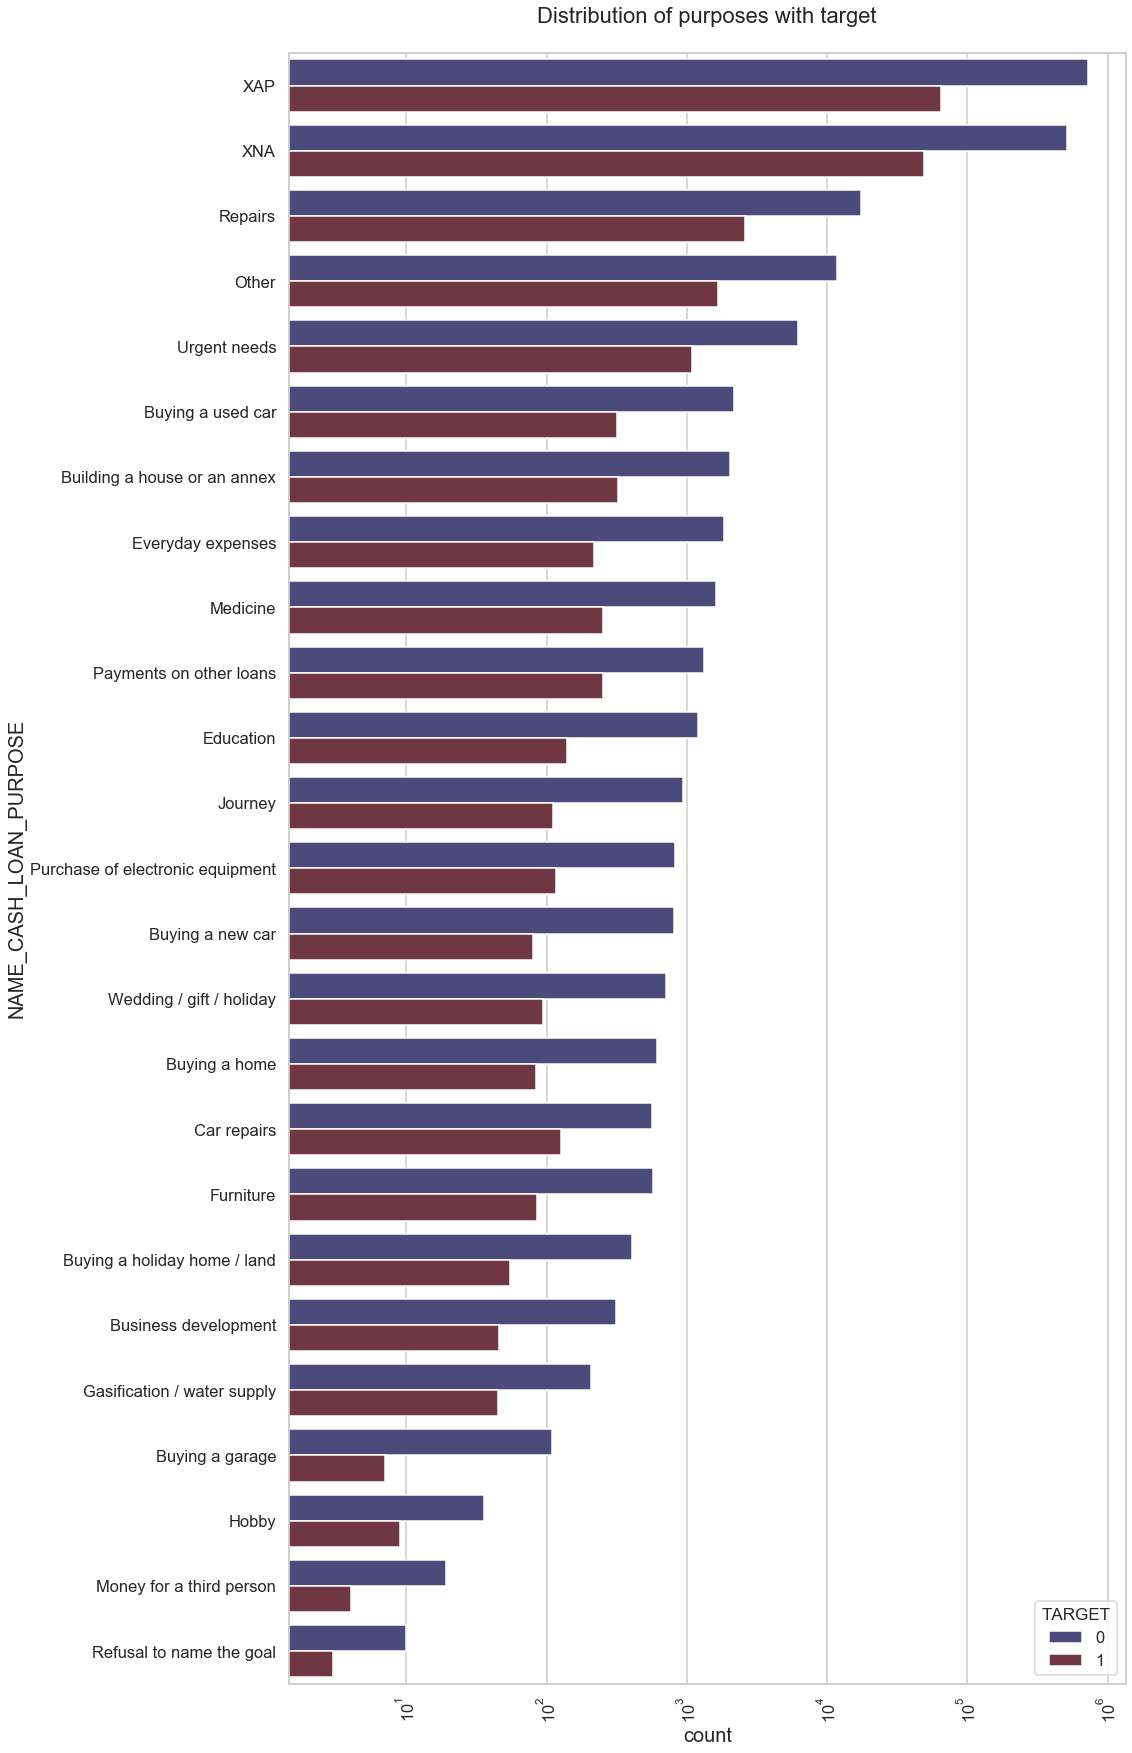

In [209]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target')

ax = sns.countplot(data = rename_merge_df, y= 'NAME_CASH_LOAN_PURPOSE', order=rename_merge_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index, hue ='TARGET', palette='icefire')

Inference : Repairs are dealing with more difficulties in payment on time Buying a garage, Business development, Buying land, Buying a new car and Education having basically higher loan payment

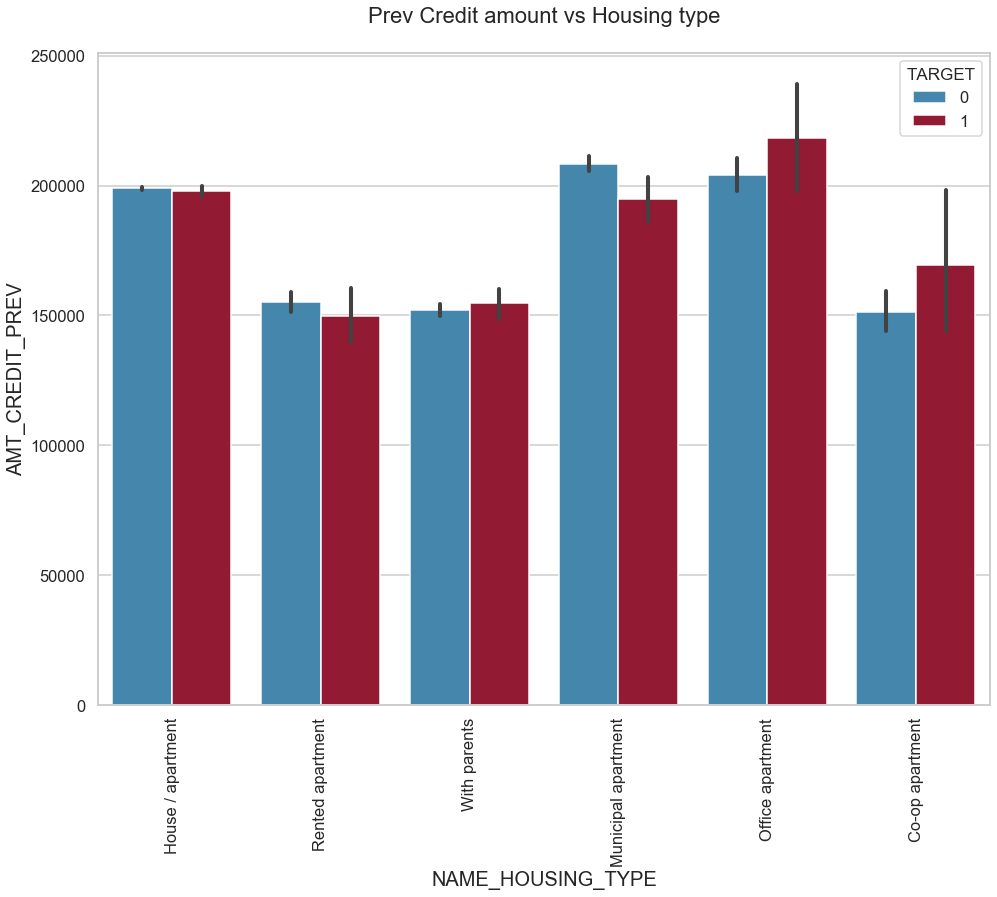

In [210]:
# Bar plotting for Credit amount prev vs Housing type

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data = rename_merge_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Inference : Office apartment is having higher credit of non-defaulters and co-op apartment is having higher credit of defaulters. Bank can focus mostly on housing type categories like ‘with parents’ or ‘house/apartment’ or municipal apartment for successful payments.

Conclusion & Recommendations

Most number of unsuccessful payments are done from loan purpose 'Repair'.

Very few unsuccessful payments are incorporated by housing type 'With Parents', so bank should adhere most clients from this type.

Income Type 'Working' shows very less promise to the bank with most number of unsuccessful payments so bank should try to avoid them.

For housing type 'Co-op apartment' ,bank should avoid giving loans as they are having difficulties in payment.